# **주성분 분석(Principal Component Analysis)**

<img src='https://images.unsplash.com/photo-1508050919630-b135583b29ab?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTF8fHBhcmlzfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60'>

- 비지도학습 알고리즘
- 차원축소 알고리즘(dimensionality reduction algorithm)
- 활용분야는 visualization, noise filtering, feature extraction and engineering

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#plt.rcParams['font.family']='Malgun Gothic'
#plt.rcParams['axes.unicode_minus'] = False

## Feature selection between ML and DL
<img src='https://quantdare.com/wp-content/uploads/2019/06/deep_learning.png' width=600>

### 20차원(20개 변수, 군집은 3개)의 데이터 500를 생성
- 2차 평면에 시각화를 위해서는 임의로 2개 특성으로만 가능**(feature selection)**
- 20개 특성변수를 PCA/SVD 차원 축소 알고리즘으로 2개의 변수(차원)로 생성**(feature extraction)** 하여 시각화가 가능

In [2]:
from sklearn.datasets import make_moons, make_circles, make_blobs

X, y = make_blobs(n_samples=500, centers=3, 
                  n_features=20, cluster_std=2, random_state=1)

print(f'특성행렬(X)의 인스턴스: {X.shape[0]}개, 변수: {X.shape[1]} 개')

print(f'종속변수(y)의 고유값 종류: {np.unique(y)}')

특성행렬(X)의 인스턴스: 500개, 변수: 20 개
종속변수(y)의 고유값 종류: [0 1 2]


<Figure size 1440x360 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X7')

Text(0.5, 1.0, 'Original space')

PCA(n_components=2)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'PCA mapping space')

TruncatedSVD()

Text(0.5, 0, 'TruncatedSVD Component 1')

Text(0, 0.5, 'TruncatedSVD Component 2')

Text(0.5, 1.0, 'SVD mapping space')

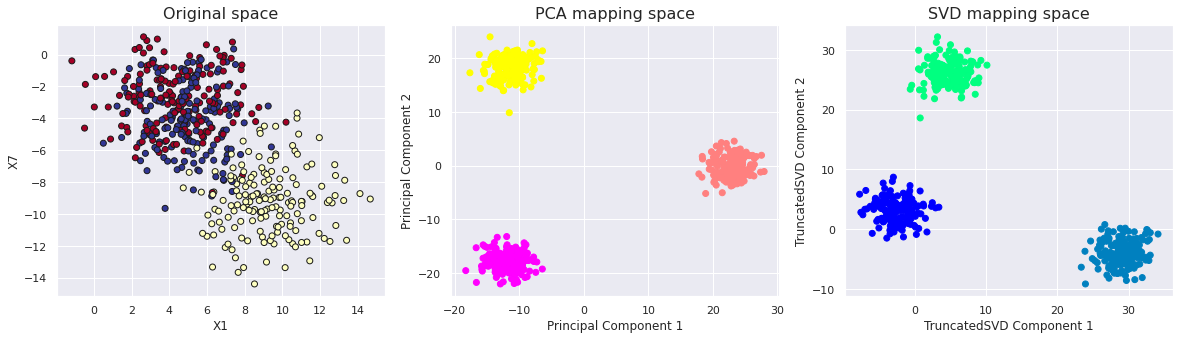

In [3]:
from sklearn.decomposition import PCA, TruncatedSVD

plt.figure(figsize=(20, 5))
####### original space
plt.subplot(131)
plt.scatter(X[:, 1], X[:, 7], c=y, cmap='RdYlBu', edgecolor='k')
plt.xlabel('X1'); plt.ylabel('X7')
plt.title('Original space', fontsize=16)

####### 2개의 주요 component로 PCA 변환
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.subplot(132)
plt.scatter(x=x_pca[:,0], y= x_pca[:,1], c= y, cmap='spring')
plt.xlabel('Principal Component 1'); plt.ylabel('Principal Component 2')
plt.title('PCA mapping space', fontsize=16)

######### 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(X)
x_tsvd = tsvd.transform(X)
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.subplot(133)
plt.scatter(x=x_tsvd[:,0], y= x_tsvd[:,1], c= y, cmap='winter')
plt.xlabel('TruncatedSVD Component 1'); plt.ylabel('TruncatedSVD Component 2')
plt.title('SVD mapping space', fontsize=16)

plt.show()

## **1. 주성분 분석(PCA)과 시각화**
- Find **"components" that capture the maximal variance within the data**.
- Linearly transform original data into PCA data projected with PCA basis function

### 원자료의 공분산을 대부분 설명해 줄 수 있도록 낮은 차원으로 데이터를 project하기 위한 **선형변형** 알고리즘(**Linear transformation** to reduce the high dimension into low dimension) 
- 비선형 자료를 변환하는 방법은 manifold 알고리즘
  * Isometric feature mapping(Isomap), Locally Linear Embedding(LLE), Stochastic Neighbor Embedding(SNE)
- Kernel 알고리즘과 심층학습방법(Autoencoder)

<img src='https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png'>

In [4]:
plt.rcParams["figure.figsize"] = (12, 6)

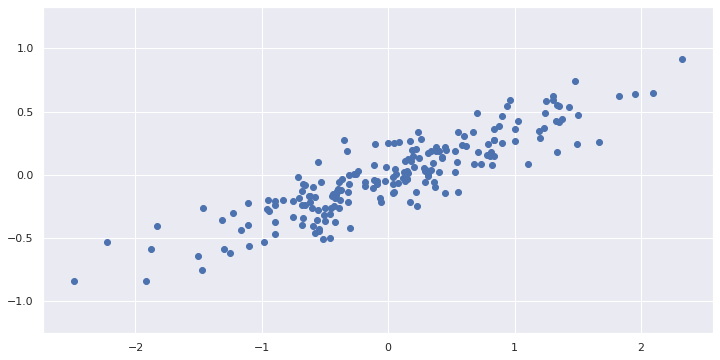

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

Scikit-Learn's ``PCA`` estimator를 사용

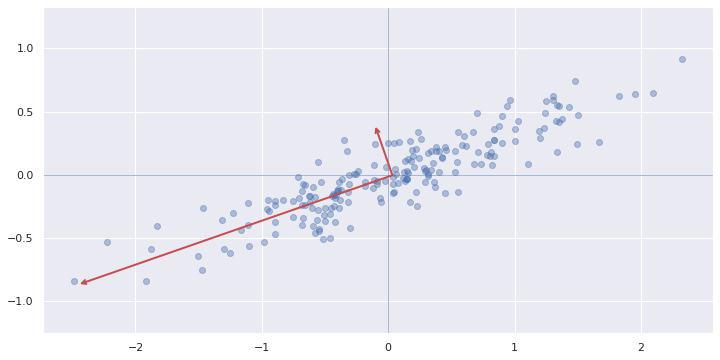

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='r',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axvline(0, linewidth=0.5); plt.axhline(0, linewidth=0.5)
plt.axis('equal');

### **주성분 벡터**
- **The eigenvectors represent the principal components that contain most of the information (variance)**

In [7]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

## **2. 주성분 분석과 선형대수**

In [8]:
X = np.array([[2,3,11], [3,5,8], [4,7,5], [3,5,8]])
X

array([[ 2,  3, 11],
       [ 3,  5,  8],
       [ 4,  7,  5],
       [ 3,  5,  8]])

평균조정된 행렬(Mean Centered Matrix)

In [9]:
X_scaled = X- X.mean(0)
X_scaled
print('\n')
X_scaled.mean(0)

array([[-1., -2.,  3.],
       [ 0.,  0.,  0.],
       [ 1.,  2., -3.],
       [ 0.,  0.,  0.]])

array([0., 0., 0.])

평균조정된 행렬의 공분산 행렬(Covariance Matrix)

In [10]:
cov = np.dot(X_scaled.T, X_scaled)
print(cov, '\n')
print(f'원래 데이터의 총변동량(공분산행렬의 trace): {np.trace(cov)}')

[[  2.   4.  -6.]
 [  4.   8. -12.]
 [ -6. -12.  18.]] 

원래 데이터의 총변동량(공분산행렬의 trace): 28.0


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
print('2개의 주성분구성 자료의 공분산, 2 by 2')
(X_pca.T@X_pca).round(2)

PCA(n_components=2)

2개의 주성분구성 자료의 공분산, 2 by 2


array([[28.,  0.],
       [ 0.,  0.]])

In [12]:
print(f'주성분 자료의 총변동량: {np.trace(np.dot(X_pca.T, X_pca))}')
print(f'원래 데이터의 총변동량: {np.trace(np.dot(X_scaled.T, X_scaled))}')

주성분 자료의 총변동량: 28.000000000000007
원래 데이터의 총변동량: 28.0


<img src='http://alexhwilliams.info/itsneuronalblog/img/pca/rank_one.png'>

## **Scikit-learn with Wiki**
### $Aλ = λV$

- Original data = $A$ (평균조정된 원자료 feature)
- Loadings = eigenvalue(diagonal matrix type), 
    * pca.explained_variance_ratio (λ) 
- Components = eigenmatrix, Principal components
    * pca.components_ ($V$)

### Mean center 혹은 Standard scaler 둘다 결과는 동일함

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X)
X_scaled = scaler.transform(X)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
print(f'주성분 자료의 총변동량: {np.trace(np.dot(X_pca.T, X_pca))}')
print(f'원래 데이터의 총변동량: {np.trace(np.dot(X_scaled.T, X_scaled))}')

PCA(n_components=2)

주성분 자료의 총변동량: 11.999999999999998
원래 데이터의 총변동량: 12.0


주성분분석실시 전에는 반드시 자료 표준화**(Importance of Feature Scaling_)**

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=2, weights=[0.8, 0.2],
                              n_features = 20, n_informative = 5, n_redundant = 15,
                              random_state=1)

print(X.shape)

(500, 20)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean(0).round(2)}, 표준편차: {X_scaled.std(0)}')

평균: [-0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0.
  0. -0.], 표준편차: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
X_scaled.mean(0)
print('\n')
X_scaled.std(0)

array([-9.32587341e-18, -6.31272812e-16, -4.52970994e-17, -1.59872116e-16,
       -1.20903287e-16,  2.15605311e-16, -4.13447054e-16, -5.08482145e-16,
        8.47100168e-17, -3.18321758e-16, -5.06039655e-16, -2.38697950e-17,
       -1.75415238e-17,  4.79616347e-17, -2.79332113e-16,  7.34967642e-17,
        6.88338275e-18,  9.32587341e-16,  1.46771484e-16, -4.26325641e-17])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

<BarContainer object of 20 artists>

Text(0.5, 0, 'The number of principal components')

Text(0, 0.5, 'The cumulative ratios of total variances')

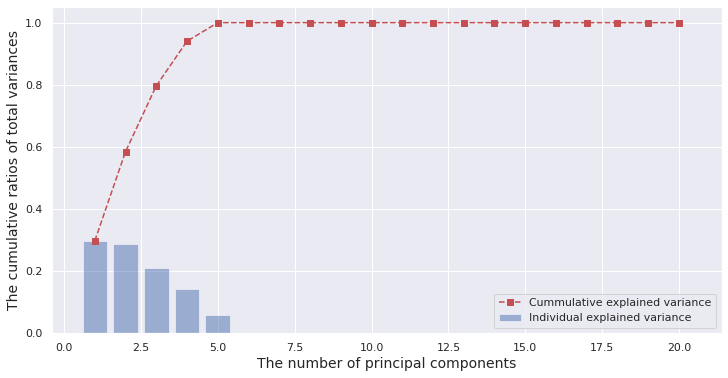

In [17]:
from sklearn.decomposition import PCA

X_pca = PCA().fit(X_scaled) # 원자료의 변수의 수만큼 주성분 변수 도출

plt.plot(np.arange(1, X_scaled.shape[1]+1), np.cumsum(X_pca.explained_variance_ratio_), 'rs--', label='Cummulative explained variance')
plt.bar(np.arange(1,len(X_pca.explained_variance_ratio_)+1), X_pca.explained_variance_ratio_, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.xlabel('The number of principal components', fontsize='14')
plt.ylabel('The cumulative ratios of total variances', fontsize='14')
plt.legend()

In [18]:
X_pca.explained_variance_ratio_
print('\n')
np.sum(X_pca.explained_variance_ratio_[:5])

array([2.97832936e-01, 2.87136894e-01, 2.11795369e-01, 1.43686655e-01,
       5.95481460e-02, 1.85588758e-32, 8.98772953e-33, 6.39788430e-33,
       4.31140702e-33, 1.75735911e-33, 1.29609739e-33, 1.08394820e-33,
       1.04649925e-33, 9.91843851e-34, 9.53502576e-34, 8.41291933e-34,
       7.60497699e-34, 6.88390726e-34, 6.11413093e-34, 3.72218475e-34])

1.0

### **주성분 3개 적용**

In [19]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
print('3개의 주성분구성 자료의 공분산, 3 by 3')
(X_pca.T@X_pca).round(2)

PCA(n_components=3)

3개의 주성분구성 자료의 공분산, 3 by 3


array([[2978.33,   -0.  ,    0.  ],
       [  -0.  , 2871.37,   -0.  ],
       [   0.  ,   -0.  , 2117.95]])

In [20]:
print(f'주성분 자료의 총변동량: {np.trace(np.dot(X_pca.T, X_pca))}')
print(f'원래 데이터의 총변동량: {np.trace(np.dot(X_scaled.T, X_scaled))}')

주성분 자료의 총변동량: 7967.651987498316
원래 데이터의 총변동량: 10000.0


## **3. 주성분 분석(PCA)과 Eigenvalues and eigenvectors**
- The eigenvalues of matrix A are values of λ that satisfy the equation

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/17f01da2e017cf67290e4b2052126122c1a27934' width=200>

### eigenvalues($λ$) = pca.explained_variance_ in scikit-learn
- The eigenvalues($λ$) represent the variance in the direction of the eigenvector.

### eigenvector($V$) = pca.components_ in scikit-learn

### **${ⱽ}^{-1}*A*{ⱽ} = {λ}$**

In [21]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000)
n_samples = X.shape[0]

pca = PCA(n_components=3)
X_transformed = pca.fit_transform(X)

# We center the data and compute the sample covariance matrix.
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print('v-1*A*v = ', np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print('lambda(eigenvalue) = ', eigenvalue)
    print('*'*50)

v-1*A*v =  2.3857488953172528
lambda(eigenvalue) =  2.3878680291845473
**************************************************
v-1*A*v =  1.8847564050564343
lambda(eigenvalue) =  1.8865397510298898
**************************************************
v-1*A*v =  1.2808662501515362
lambda(eigenvalue) =  1.2799013376761414
**************************************************


## 주성분(Principal Componnents)의 선형대수 의미
- 기존 변수들을 선형 조합한 새로운 변수
- 좌표축을 회전하여 새로운 변수 (새로운 좌표) 생성
- 기존 변수들의 총변동과 새로운 변수의 총변동은 동일
- 총변동의 대부분을 설명하는 소수의 새로운 변수를 찾는 것이 목적

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Eigenvalue_equation.svg/500px-Eigenvalue_equation.svg.png' width=300>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Eigenvectors_of_a_linear_operator.gif/400px-Eigenvectors_of_a_linear_operator.gif' width=300>

## **4. 주성분(PCA)와 이미지 축약**
- 주성분 분석을 위한 알고리즘 소개

   * (1) 분광 분해(Spectral decomposition) : 요인분석(factor analysis)
   * (2) 특이치 분해(Singular Value Decomposition) : Scikit-learn API
   * (3) 축소된 특이치 분해(Truncated SVD)
   
 https://angeloyeo.github.io/2019/08/01/SVD.html

In [22]:
from scipy import misc
sns.reset_defaults() 
img_array = misc.face()
red_array = img_array[:, :, 0] #img_gray = img_array @ [0.2126, 0.7152, 0.0722]
# green_array = img_array[:, :, 1], blue_array = img_array[:, :, 2]
img_array.shape
red_array.shape

(768, 1024, 3)

(768, 1024)

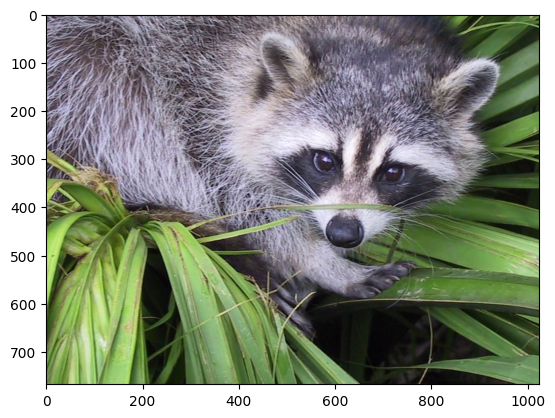

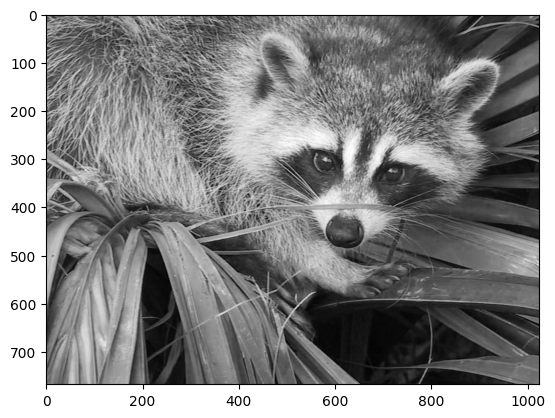

In [23]:
plt.imshow(img_array, cmap="gray"); plt.show()
plt.imshow(red_array, cmap="gray")

## **5. 주성분(PCA)과 기저변수의 시각화**
- Hand-written digits
고차원 자료인 수기체 이미지에 PCA 적용
8×8 pixel images 자료, 총 64차원
2 개의 주성분으로 2차원 평면에서 이미지 기호(0~9) 확인
- 주성분은 **basis function의 기저변수(The basis function)** 역할


64차원 원자료   크기: (1797, 64)
 2차원 축소자료 크기: (1797, 2)


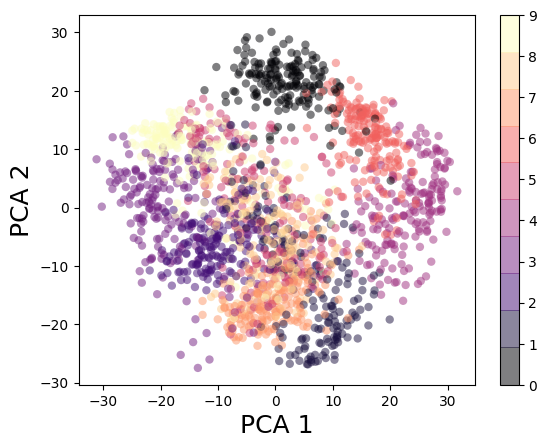

In [24]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = load_digits()

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(f'64차원 원자료   크기: {digits.data.shape}')
print(f' 2차원 축소자료 크기: {projected.shape}')

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('PCA 1', fontsize=18); plt.ylabel('PCA 2', fontsize=18)
plt.colorbar();

원래 데이터(64 차원)에서 가장 큰 분산을 갖는 방향을 2개의 주성분에 의한 각 데이터 포인트의 투영입니다.
- 개념적으로 64 차원 공간에서 최적의 확장 및 회전 선형변환을 발견하여 2차원에서 거의 완벽하게 비지도 학습하여 구분에 성공

### 주성분의 의미

64차원의 벡터로 이루어진 원자료를
$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

차원이 축소된 주성분으로 총 변동량을 대부분 설명이 가능하다. 64차원의 변수의 선형결합으로 원자료는 아래와 같이 표현

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

원자료의 90%를 표현할 수 있는 주성분(새로운 기저변수)

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA는 최적의 기저변수와 각 기저변수의 계수로 이루어진 함수를 찾는 과정(optimal basis functions)

## **6. 주성분(PCA)와 자료 복원**
- PCA 알고리즘을 사용하여  high dimensionality 데이터를 저차원의 데이터로 빠르고 효율적으로 인식하여 원래데이터로 복원할 수있다.
  * 얼굴인식, 이미지복원 등 분야에서 활용

In [25]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

PCA(n_components=2)

original shape:    (1000, 20)
transformed shape: (500, 2)


##### 20차원의 원자료를 2차원으로 축소한 주성분으로 inverse transform하여 원자료를 복원하여  원자료와 같이 표현

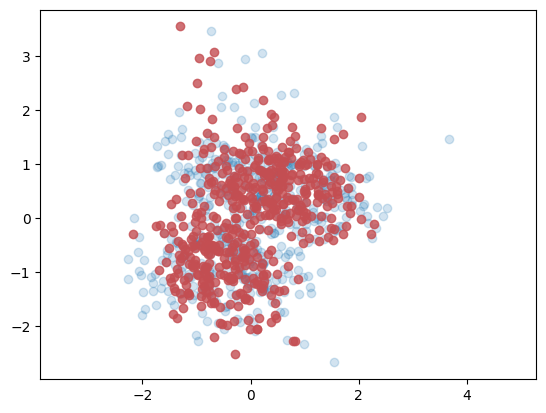

In [26]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')
plt.axis('equal');

- 옅은 색은 원자료이고 붉은 색은 projected version임
- 총변동량은 가장 많이 설명하는 주성분으로 복원하면 거의 원자료와 비슷하게 됨

## **7. 주성분(PCA)과 노이즈 제거(Noise Filtering)**

- 잡음(noise)의 영향보다 훨씬 큰 분산을 가진 주성분은 상대적으로 잡음의 영향을 받지 않고 주성분을 사용하여 데이터를 재구성하는 경우 우선적으로 신호를 유지하고 노이즈를 제거하게 됨

잡음(noise)를 발생시켜 데이터에 주입

- 잡음이 있는 이미지는 손상되었지만 50% 총변동량을 갖는 주성분 개수 12개를 추출
- 주성분의 inverse of the transform으로 이미지를 filtering하여 데이터를 복원
- 고차원 자료(very high-dimensional data)로 예측하는 대신 원자료의 총변동량을 대부분 설명하는 주성분으로 표현(representation)이 가능

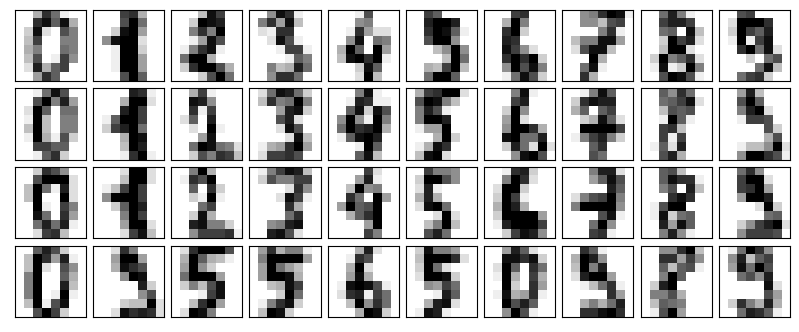

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

원자료 총변동량의 50%를 설명하는 주성분 개수: 9


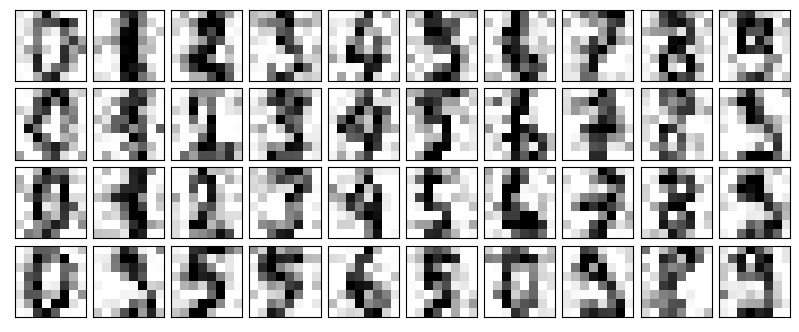

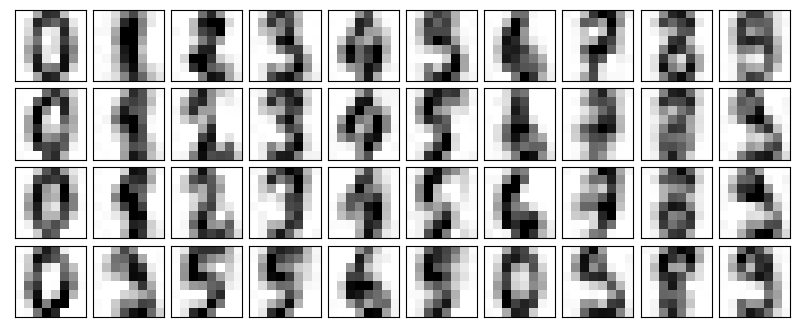

In [28]:
noisy = np.random.normal(digits.data, 3)
pca = PCA(0.50).fit(noisy)
print(f'원자료 총변동량의 50%를 설명하는 주성분 개수: {pca.n_components_}')
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(noisy); plt.show()
plot_digits(filtered)

## **8. SVD와 eigenface 실습예제**
### SVD(singular value decomposition)은 정방형행렬이 아닌 행렬을 3개의 행렬로 인수분해(decomposition)하여 차원을 축소
### 이미지 압축, 복원, 텍스트마이닝의 Topic Model에 응용
https://en.wikipedia.org/wiki/Singular_value_decomposition

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/3315de0d8549ccefd4c619e4e6cce6ba041dde3c'>
<img src='https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-08-01_SVD/pic_SVD.png'>

<img src='https://miro.medium.com/max/1400/0*hVJJfuJiS8Wk7jC7'>

### Example reconstruction of data with 3 principal components. 
- A data matrix (Original Data, $n$ x $p$) is approximated by the product of a Loadings($n$ x $r$ matrix) and a  Components(matrix $r$ x $k$ $WC^T$).
     * $p >= k$ for dimensionality reduction  
- This product is at most a rank- matrix (in this example, $r=3$). 
- Each paired column of $W$ and row of $C^T$ form an outer product, so the full reconstruction can also be thought of as a sum of $r$ rank-one matrices.

<img src='http://alexhwilliams.info/itsneuronalblog/img/pca/pca_3.png' width=800>

- http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/
- $ {X} \approx \sum_{k=1}^r \mathbf{w}_k \mathbf{c}_k^T \quad \text{or} \quad \mathbf{X} \approx W C^T$
    * We can organize the top  principal components into a matrix $C = [c_1,c_2,.....c_r]$ and the loading weights into $W = [w_1,w_2,.....w_r]$. 
    * Our reconstruction of the data is now a sum of  outer products

### Truncated SVD 로 차원축소

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

원래 이미지 자료의 차원: (1348, 62, 47)


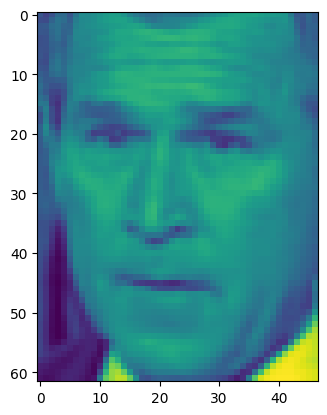

In [29]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import TruncatedSVD
faces = fetch_lfw_people(min_faces_per_person=60)
faces.keys()
print(f'원래 이미지 자료의 차원: {faces.images.shape}')
plt.imshow(faces.images[1])

In [30]:
pca = TruncatedSVD(150)
pca.fit(faces.data)
faces_svd = pca.fit(faces.data).transform(faces.data)
faces_svd.shape

TruncatedSVD(n_components=150)

(1348, 150)

총 150개의 주성분중에서 24개의 주성분(eigenvectors)을 살펴보면, 즉 24개의 "eigenfaces"

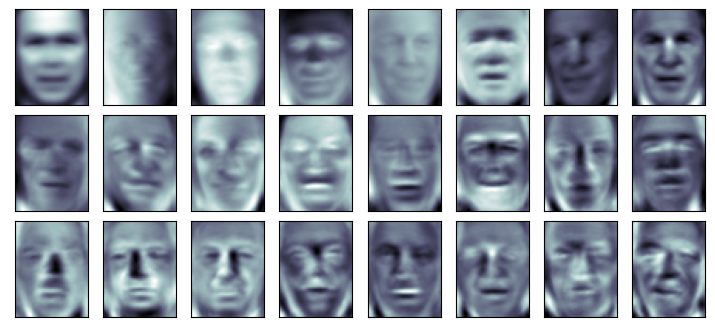

In [31]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- 왼쪽 윗편은 주성분얼굴 : 얼굴에 비치는 빛의 각도
- 나머자 주성분얼굴 : 눈, 코, 입술

주성분 개수와 누적 총변동량

<BarContainer object of 150 artists>

Text(0.5, 0, 'The number of PCA')

Text(0, 0.5, 'The cummulative total explained variance ratio')

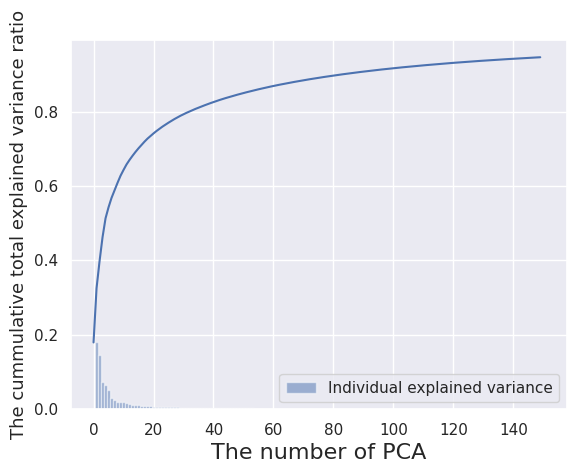

In [32]:
sns.set()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.bar(np.arange(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.xlabel('The number of PCA', fontsize='16'); plt.ylabel('The cummulative total explained variance ratio', fontsize='13')
plt.legend()

150개의 주성분으로 90%이상의 원자료 변동량을 설명하고 있어 주성분 150개로 원래 이미지를 복원 

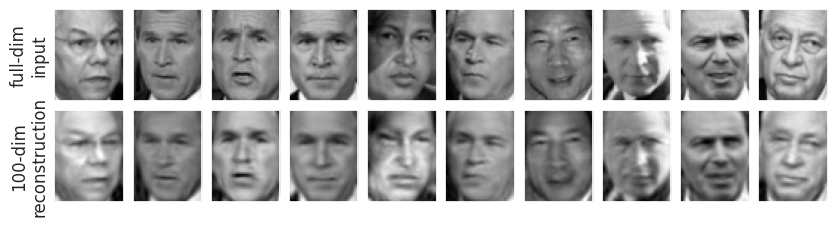

In [33]:
projected = pca.inverse_transform(faces_svd)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

## **8. 주성분 분석(PCA) 요약**
- In this section we have discussed the use of principal component analysis for ,<b>dimensionality
reduction, for visualization of high-dimensional data, for noise filtering, and
for feature selection within high-dimensional data</b>. 
- Given any high-dimensional dataset, I tend to start with PCA in
order to visualize the relationship between points (as we did with the digits), to <b>understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio)</b>.
- Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data. PCA’s main weakness is that it tends to <b>be highly affected by outliers</b> in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.

## **9. 원자료가 비선형일 경우 : Kernel Principal Component Analysis (KPCA)**
- Projecting data: PCA vs. KernelPCA
- 원자료(original space에서 비선형자료형태일 경우)

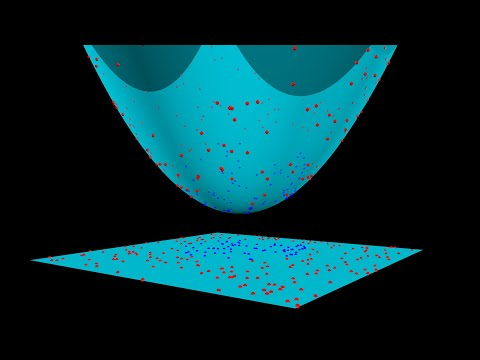

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA', height='600', width='1000')

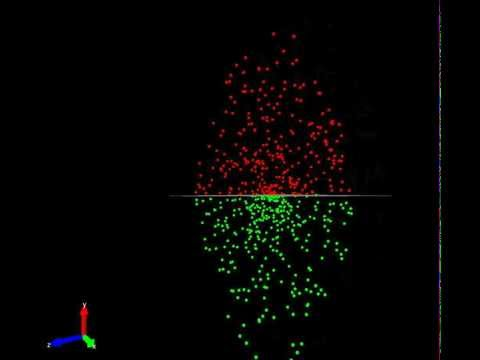

In [43]:
YouTubeVideo('ndNE8he7Nnk', height='600', width='1000')

## **10. 지도학습과 PCA**
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

## **11. Different Uses of Dimensionality Reduction**
- https://towardsdatascience.com/11-different-uses-of-dimensionality-reduction-4325d62b4fa6

## **12. Dimensionality Reduction — PCA, ICA and Manifold learning**
- https://techairesearch.com/dimensionality-reduction-pca-ica-and-manifold-learning/

# END